In [5]:
import numpy as np

In [6]:
def mean_squared_error(y_hat, y):
    return np.sum((y_hat - y)**2)/y.size

In [7]:
y = np.array([1, 2, 3, 4])
y_hat1 = np.array([1.2, 1.9, 2.9, 4.2]) 
mean_squared_error(y_hat1, y)

0.025000000000000022

In [8]:
y_hat2 = np.array([2.2, 0.9, 2.9,  5.2]) 
mean_squared_error(y_hat2, y)

1.0250000000000004

In [9]:
def cross_entropy_error(y_hat, y):
    return -np.sum(y*np.log(y_hat + 1e-7))

In [10]:
y = np.array([0, 1, 0, 0, 0])

In [11]:
y_hat1 = np.array([0.1, 0.7, 0.1, 0.1, 0])

In [12]:
cross_entropy_error(y_hat1, y)

0.3566748010815999

In [13]:
y_hat2 = np.array([0.7, 0.05, 0.05, 0.2, 0])

In [14]:
cross_entropy_error(y_hat2, y)

2.9957302735559908

In [15]:
import mnist

my_mnist = mnist.Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [16]:
(train_images, train_labels), (_, _) = my_mnist.load()

In [17]:
train_size = train_images.shape[0]
batch_size = 32

In [18]:
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[ 6484 51600 38583 26565 31008 15833 23425 16488 14653 14538 58488 35466
 42062 45886 42270 36180 52725 43477 25723  8591 11678 55943  7163 20613
 22602 25624 29700 40749    58 31934 35514 43330]


In [19]:
train_size

60000

In [20]:
# for mini-batch training.
def cross_entropy_error(y_hat, y):
    batch_size = 1 if y_hat.ndim == 1 else y_hat.shape[0]
    return -np.sum(y*np.log(y_hat + 1e-7))/batch_size

In [21]:
y_hat_batch = np.array([ [0.2, 0.2, 0.3, 0.1, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6]])
y_batch = np.array([ [0, 0, 1, 0,  0], [0, 0, 0, 0, 1]])

In [22]:
cross_entropy_error(y_hat_batch, y_batch)

0.8573989640459981

In [23]:
(0.1/10e-50)

1e+48

In [24]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x))/h

In [25]:
def func(x):
    return x**2 + 0.1*x

In [26]:
numerical_diff(func, 0.8)

0.0

In [27]:
# more reasonable approximation
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [28]:
numerical_diff(func, 0.8)

1.6999999999994797

In [29]:
numerical_diff(func, 0.2)

0.49999999999994493

In [30]:
def func(x):
    return x[0]**2 + x[1]**2

def func_tmp1(x0):
    return x0**2 + 4.0**2

In [31]:
numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [32]:
def func_tmp2(x1):
    return 3.0**2 + x1**2

In [33]:
numerical_diff(func_tmp2, 4.0)

7.999999999999119

## Numerical Gradient

In [34]:
import numpy as np

In [35]:
def func2(x):
    return x[0]**2 + x[1]**2

In [36]:
# partial derivatives when x0 = 3, x1 = 4

def func_tmp1(x0):
    return x0**2 + 4**2

def func_tmp2(x1):
    return 3**2 + x1**2

In [37]:
def _numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [38]:
def _numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val 
        
    return grad

In [39]:
_numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [40]:
_numerical_diff(func_tmp2, 4.0)

7.999999999999119

In [41]:
_numerical_gradient(func2, np.array([3.0, 4.0]))

array([6., 8.])

In [42]:
def gradient_descent(f, init_x, lr=0.1, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = _numerical_gradient(f, x)
        x -= lr*grad  # x = x - lr*grad

    return x

In [43]:
init_x = np.array([2800.0, 1000.0])
# func2 = x0**2 + x1**2
gradient_descent(func2, init_x, step_num=10000, lr=0.001)

array([5.65680105e-06, 2.02028609e-06])

## SimpleNet

In [44]:
class SimpleNet:
    def __init__(self):
        self.w = np.random.randn(2, 3)


    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))


    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size


    # for multi-dimensional x
    def numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad


    def predict(self, x):
        return np.dot(x, self.w)
    

    def loss(self, x, y):
        z = self.predict(x)
        y_hat = self.softmax(z)
        loss = self.cross_entroy_error(y_hat, y)

        return loss

In [45]:
# let's test SimpleNet
net = SimpleNet()
print(net.w)

[[ 0.38623304  0.89211083  0.87559396]
 [ 0.82293965  0.89176406 -1.02571145]]


In [46]:
x = np.array([0.7, 0.19])
p = net.predict(x)
print(p)

[0.42672166 0.79391275 0.4180306 ]


In [47]:
np.argmax(p)

1

In [48]:
y = np.array([0, 1, 0])
net.loss(x, y)

0.8668315241590094

In [49]:
y = np.array([0, 0, 1])
net.loss(x, y)

1.2427135679883237

In [50]:
def loss_function(w):
    return net.loss(x, y)

In [51]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.20378329  0.29419659 -0.49797988]
 [ 0.05531261  0.07985336 -0.13516597]]


In [52]:
# using lamda
loss_function = lambda w: net.loss(x, y)

In [53]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.20378329  0.29419659 -0.49797988]
 [ 0.05531261  0.07985336 -0.13516597]]


## TwoLayerNet class

In [54]:
class Activations:
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))

In [55]:
class Errors:
    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size

In [56]:
import activations
import errors

In [57]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = activations.Activations()
        self.errors = errors.Errors()

    def predict(self, x):
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = self.activations.sigmoid(a1)
        a2 = np.dot(z1, w2) + b2
        y = self.activations.softmax(a2)

        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        return self.errors.cross_entropy_error(y_hat, y)
    

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    # for multi-dimensional x
    def _numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad
    

    def numerical_gradient(self, x, y):
        loss_w = lambda w: self.loss(x, y)

        grads = {}
        grads['w1'] = self._numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = self._numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = self._numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = self._numerical_gradient(loss_w, self.params['b2'])

        return grads

## Train TwoLayerNet

In [58]:
import mnist
import two_layer_net

import matplotlib.pyplot as plt
import numpy as np

In [59]:
my_mnist = mnist.Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [60]:
(x_train, y_train), (x_test, y_test) = my_mnist.load()

In [61]:
network = two_layer_net.TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10)

In [62]:
iterations = 1
train_size = x_train.shape[0]
batch_size = 32
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [63]:
train_losses = []
train_accs = []
test_accs = []

In [64]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.numerical_gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.0993, 0.1032


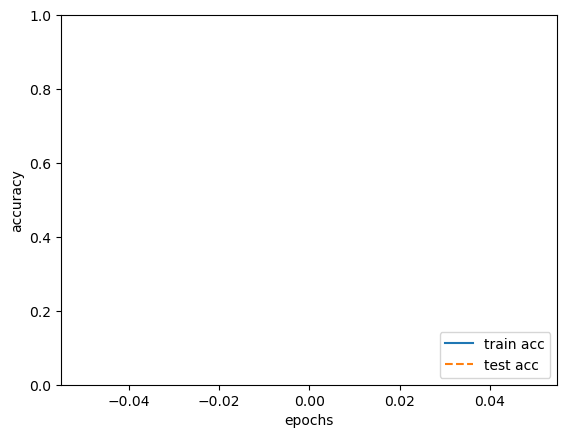

In [65]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## Backpropagation

In [66]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None
        self.activations = Activations()

    def forward(self, x):
        out = self.activations.sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
        self.x = None
        self.original_x_shape = None

        self.dw = None
        self.db = None

    def forward(self, x):
        # 
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.w) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.w.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None 
        self.y_hat = None    
        self.y = None    
        self.activations = Activations()
        self.errors = Errors()
        
    def forward(self, x, y):
        self.y = y
        self.y_hat = self.activations.softmax(x)
        self.loss = self.errors.cross_entropy_error(self.y_hat, self.y)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        #if self.y.size == self.y_hat.size: # one hot encoding
        
        dx = (self.y_hat - self.y) / batch_size
        
        """
        else:
            dx = self.y_hat.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        """
        return dx

## Two Layer Net with Backpropagation

In [67]:
from activations import Activations
from errors import Errors

In [68]:
from collections import OrderedDict

In [109]:
import numpy as np

class TwoLayerNetWithBackProp:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = Activations()
        self.errors = Errors()

        # add layers
        self.layers = OrderedDict()
        self.update_layers()
        self.last_layer = SoftmaxWithLoss()

    def update_layers(self):
        self.layers['Affine1'] = Affine(self.params['w1'], self.params['b1'])
        self.layers['Rele1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['w2'], self.params['b2'])


    def predict(self, x):
        ## new implementation for backprop
        for layer in self.layers.values():
            x = layer.forward(x)

        y = x
        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        # return self.errors.cross_entropy_error(y_hat, y)
        return self.last_layer.forward(y_hat, y)

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    def gradient(self, x, y):
        self.loss(x, y)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['w1'] = self.layers['Affine1'].dw
        grads['b1'] = self.layers['Affine1'].db
        grads['w2'] = self.layers['Affine2'].dw
        grads['b2'] = self.layers['Affine2'].db
      
        return grads

In [70]:
from mnist import Mnist

In [71]:
mnist = Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [72]:
(x_train, y_train), (x_test, y_test) = mnist.load()

In [73]:
print(x_train.shape)

(60000, 784)


In [74]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [75]:
iterations = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [76]:
train_losses = []
train_accs = []
test_accs = []

In [77]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.12563333333333335, 0.1245
train acc, test_acc : 0.9043166666666667, 0.9074
train acc, test_acc : 0.92725, 0.927
train acc, test_acc : 0.9405166666666667, 0.9412
train acc, test_acc : 0.9498833333333333, 0.9463
train acc, test_acc : 0.9563666666666667, 0.9537
train acc, test_acc : 0.9619833333333333, 0.9583
train acc, test_acc : 0.9665666666666667, 0.9629
train acc, test_acc : 0.9697333333333333, 0.9662
train acc, test_acc : 0.97165, 0.9667
train acc, test_acc : 0.9752833333333333, 0.9687
train acc, test_acc : 0.97645, 0.9699
train acc, test_acc : 0.9772666666666666, 0.9709
train acc, test_acc : 0.9803666666666667, 0.9726
train acc, test_acc : 0.9816333333333334, 0.9729
train acc, test_acc : 0.9829, 0.9739
train acc, test_acc : 0.9839166666666667, 0.9737


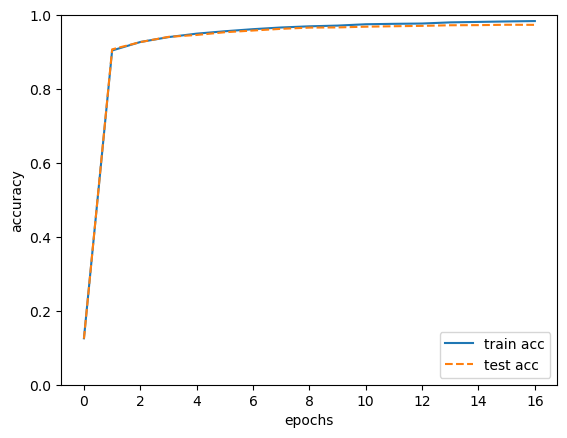

In [78]:
import matplotlib.pyplot as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [79]:
import numpy as np
import pickle

my_weight_pkl_file = 'rustam_weights.pkl'

In [80]:
with open(f'{my_weight_pkl_file}', 'wb') as f:
    print(f'Pickle: {my_weight_pkl_file} is being created.')
    pickle.dump(network.params, f)
    print('Done.') 

Pickle: rustam_weights.pkl is being created.
Done.


In [81]:
network.params = None

## Using your own TwoLayerNet model

In [82]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [83]:
with open(f'{my_weight_pkl_file}', 'rb') as f:
    network.params = pickle.load(f)

In [84]:
from mnist import Mnist

In [85]:
mnist = Mnist()
(_, _), (x_test, y_test) = mnist.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [86]:
y_hat = network.predict(x_test[0:100])

In [87]:
import matplotlib.pyplot as plt

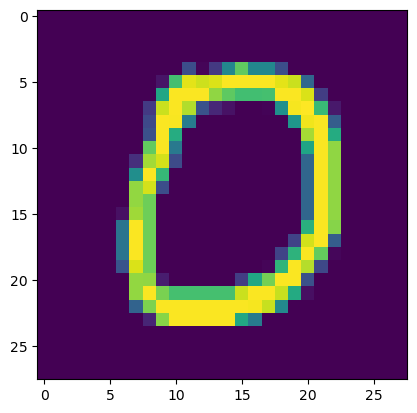

In [88]:
plt.imshow(x_test[10].reshape(28,28))

In [89]:
y_hat[10]

array([-0.00707592, -0.00161034,  0.00454441,  0.00430851, -0.00655259,
        0.00176789,  0.00328296, -0.00102882, -0.00068854, -0.00094364])

In [90]:
np.argmax(y_hat[10])

2

## Test Handwriting Images

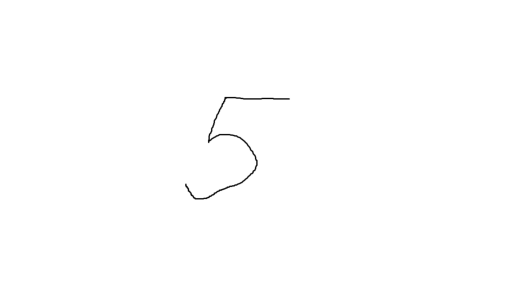

In [99]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("5_2.png")

plt.imshow(image)
plt.axis('off')
plt.show()

In [100]:
new_image = image.convert('L') 
new_image = new_image.resize((28,28)) 
new_image

In [101]:
new_image = np.array(new_image)
new_image = 255 - new_image
new_image

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  

In [102]:
new_image = (new_image - np.min(new_image)) * (255 / (np.max(new_image) - np.min(new_image)))
new_image = new_image.astype(np.float32) / 255.0  
new_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [103]:
new_image = new_image.flatten()
new_image = new_image.reshape((1, 784))
new_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [110]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

with open(f'Aslam_mnist_model.pkl', 'rb') as f:
    network.params = pickle.load(f)
    
network.update_layers()

y_hat = network.predict(new_image)
p = np.argmax(y_hat)
p

5